Linear Regression

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
from scipy.stats import f_oneway, ttest_ind

In [2]:
df_linear_regression = pd.read_csv('melb_data.csv')
df_linear_regression.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Bikin Copy data untuk back up

In [5]:
df_linear_regression_copy = df_linear_regression.copy()

In [7]:
df_linear_regression = df_linear_regression_copy[['BuildingArea', 'Price']].copy()

In [9]:
df_linear_regression.describe()

,BuildingArea,Price
count,7130.000000,1.358000e+04
mean,151.967650,1.075684e+06
std,541.014538,6.393107e+05
min,0.000000,8.500000e+04
25%,93.000000,6.500000e+05
50%,126.000000,9.030000e+05
75%,174.000000,1.330000e+06
max,44515.000000,9.000000e+06


Karena banyak data yang missing, kita buang data-data yang missing tersebut

In [12]:
df_linear_regression.dropna(inplace=True)
df_linear_regression.reset_index(drop=True, inplace=True)

Melihat data setelah buang data missingnya

In [13]:
df_linear_regression.describe()

,BuildingArea,Price
count,7130.000000,7.130000e+03
mean,151.967650,1.079923e+06
std,541.014538,6.746922e+05
min,0.000000,1.310000e+05
25%,93.000000,6.310000e+05
50%,126.000000,8.950000e+05
75%,174.000000,1.335000e+06
max,44515.000000,9.000000e+06


In [14]:
df_linear_regression.corr()

,BuildingArea,Price
BuildingArea,1.000000,0.090981
Price,0.090981,1.000000


(0.0, 1000.0)

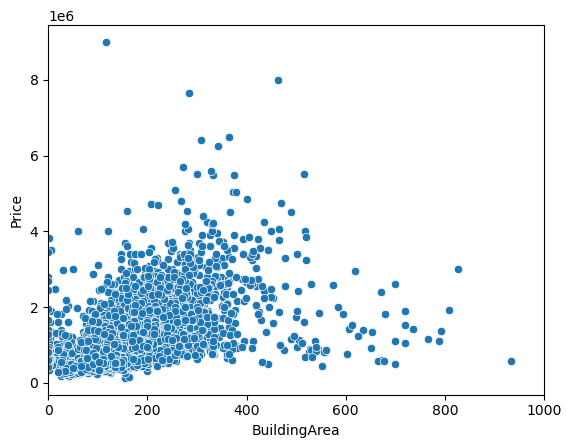

In [ ]:
sns.scatterplot(
    data=df_linear_regression,
    x='BuildingArea',
    y='Price'
)

Filtering data untuk building area yang kurang dari 1000, supaya lebih masuk akal datanya

In [29]:
df_linear_regression = df_linear_regression[(df_linear_regression['BuildingArea'] > 0) & (df_linear_regression['BuildingArea'] < 1000)]

<Axes: xlabel='BuildingArea', ylabel='Price'>

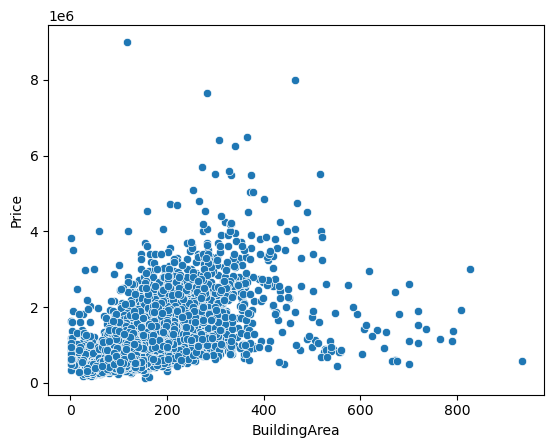

In [30]:
sns.scatterplot(
    data=df_linear_regression,
    x='BuildingArea',
    y='Price'
)

Korelasinya juga lebih bagus

In [31]:
df_linear_regression.corr()

,BuildingArea,Price
BuildingArea,1.000000,0.555659
Price,0.555659,1.000000


Untuk melakukan machine learning, kita harus bagi data untuk dipelajarin sama komputer dan ditest sama komputer

Dengan proporsi: 80% untuk Training dan 20% untuk Testing

In [61]:
df_train = df_linear_regression.sample(frac=0.8, random_state=0).copy()
print(df_train)

      BuildingArea      Price
5362         300.0  1450000.0
6939         110.0   766000.0
7106         116.0   937000.0
3054         214.0  1645000.0
5464          63.4   445000.0
...            ...        ...
6881         180.0  3000000.0
5785         124.0  1285000.0
6368         129.0  1405000.0
7107         124.0  1224000.0
6211           3.0   862000.0

[5684 rows x 2 columns]


In [62]:
df_test = df_linear_regression.sample(frac=0.2, random_state=0).copy()
print(df_test)

      BuildingArea      Price
5362         300.0  1450000.0
6939         110.0   766000.0
7106         116.0   937000.0
3054         214.0  1645000.0
5464          63.4   445000.0
...            ...        ...
3701         237.0   915000.0
3015         170.0  1465000.0
5586         155.0   535000.0
66           147.0  2000000.0
1648         118.0   610000.0

[1421 rows x 2 columns]


Membagi data untuk feature (x) dan response (y)

X -> data independent

Y -> data dependent

In [48]:
x_train = pd.DataFrame(df_train['BuildingArea'].copy())
y_train = pd.DataFrame(df_train['Price'].copy())

x_test = pd.DataFrame(df_test['BuildingArea'].copy())
y_test = pd.DataFrame(df_test['Price'].copy())

In [43]:
from sklearn.linear_model import LinearRegression

Bikin model machine learning menggunakan Linear Regression

In [49]:
simple_linear_regression_model = LinearRegression().fit(
    X = x_train,
    y = y_train
)

Melihat score dari model yang sudah kita buat menggunakan data training

In [63]:
simple_linear_regression_model.score(
    X=x_train,
    y=y_train
)

0.32440092743703763

Melihat score dari model yang sudah kita buat menggunakan data test

In [64]:
simple_linear_regression_model.score(
    X=x_test,
    y=y_test
)

0.3255291425464307

Rumus Linear Regression

Y = a + bx

a = constant / intercept

b = coefficient / slope

Mengatahui Slope / Coefficient

In [71]:
cdf = pd.DataFrame(simple_linear_regression_model.coef_, x_train.columns, columns=['Coefficients'])
cdf

,Coefficients
BuildingArea,4618.39476


Mengetahui Intercept / Constant

In [72]:
simple_linear_regression_model.intercept_

array([416529.38279636])

Cara lain membagi data train dan test

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_linear_regression['BuildingArea'],
    df_linear_regression['Price'],
    test_size=0.2,
    random_state=13
)

--------------------------------------------------------------------------------------------------------

Excercise Simple Linear Regression

In [73]:
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [76]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [77]:
df_tips_copy = df_tips.copy()

In [78]:
df_tips = df_tips_copy[['total_bill', 'tip']].copy()

In [79]:
df_tips.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<Axes: xlabel='total_bill', ylabel='tip'>

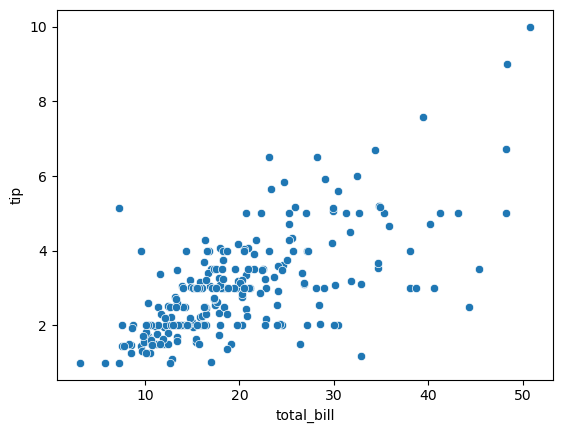

In [80]:
sns.scatterplot(
    data=df_tips,
    x='total_bill',
    y='tip'
)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    df_tips['total_bill'],
    df_tips['tip'],
    test_size=0.2,
    random_state=13
)

In [85]:
tips_simple_linear_regression_model = LinearRegression().fit(
    X = pd.DataFrame(X_train),
    y = pd.DataFrame(y_train)
)

In [87]:
tips_simple_linear_regression_model.coef_

array([[0.10129811]])

In [88]:
tips_simple_linear_regression_model.intercept_

array([0.9400936])

In [86]:
tips_simple_linear_regression_model.score(X=pd.DataFrame(X_train), y=pd.DataFrame(y_train))

0.4441155030755628

In [89]:
tips_simple_linear_regression_model.score(X=pd.DataFrame(X_test), y=pd.DataFrame(y_test))

0.4992053352637864

In [91]:
anova_result = f_oneway(df_tips['total_bill'], df_tips['tip'])
anova_result

F_onewayResult(statistic=847.2054895002854, pvalue=1.4419939457084766e-108)

In [95]:
ttest_result = ttest_ind(df_tips['total_bill'], df_tips['tip'])
ttest_result

TtestResult(statistic=29.1067945590078, pvalue=1.4419939457083578e-108, df=486.0)